In [116]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np

Скачайте датасет House Prices Kaggle со страницы конкурса

(https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data)

и сохраните его в том же каталоге, что и ваш скрипт или блокнот Python.

Загрузите датасет в pandas DataFrame под названием df.

In [117]:
# Загрузка датасета
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Выполните предварительную обработку данных, выполнив следующие шаги:

a. Определите и обработайте отсутствующие значения в датасете.

Определите, в каких столбцах есть отсутствующие значения, и решите,

как их обработать (например, заполнить средним, медианой или модой,

или отбросить столбцы/строки с существенными отсутствующими значениями).

In [119]:
# Уберем колонки, в которых отсутствует более 10% данных
count_values = df.Id.count()
count_null = df.isnull().sum()
filter_null = count_null[count_null/count_values>0.1].index
df = df.drop(columns=filter_null)
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch'

In [120]:
# Список оставшихся колонок с пустыми значениями
count_null = df.isnull().sum()
filter_null = count_null[count_null>0].index
filter_null

Index(['MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Electrical', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond'],
      dtype='object')

In [121]:
df[filter_null].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MasVnrArea    1452 non-null   float64
 1   BsmtQual      1423 non-null   object 
 2   BsmtCond      1423 non-null   object 
 3   BsmtExposure  1422 non-null   object 
 4   BsmtFinType1  1423 non-null   object 
 5   BsmtFinType2  1422 non-null   object 
 6   Electrical    1459 non-null   object 
 7   GarageType    1379 non-null   object 
 8   GarageYrBlt   1379 non-null   float64
 9   GarageFinish  1379 non-null   object 
 10  GarageQual    1379 non-null   object 
 11  GarageCond    1379 non-null   object 
dtypes: float64(2), object(10)
memory usage: 137.0+ KB


In [122]:
# Обработаем пустые значения: медианное - для числовых данных, мода - для строковых
for i in filter_null:
    if df[i].dtype=='O':
        most_frequent_values = df[i].mode().iloc[0]
        df[i] = df[i].fillna(most_frequent_values)
    elif df[i].dtype=='float64':
        median_values = df[i].median()
        df[i] = df[i].fillna(median_values)
        df[i] = df[i].astype('int64')

df[filter_null].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MasVnrArea    1460 non-null   int64 
 1   BsmtQual      1460 non-null   object
 2   BsmtCond      1460 non-null   object
 3   BsmtExposure  1460 non-null   object
 4   BsmtFinType1  1460 non-null   object
 5   BsmtFinType2  1460 non-null   object
 6   Electrical    1460 non-null   object
 7   GarageType    1460 non-null   object
 8   GarageYrBlt   1460 non-null   int64 
 9   GarageFinish  1460 non-null   object
 10  GarageQual    1460 non-null   object
 11  GarageCond    1460 non-null   object
dtypes: int64(2), object(10)
memory usage: 137.0+ KB


b. Проверьте и обработайте любые дублирующиеся строки в датасете. c. Проанализируйте типы данных в каждом столбце и при необходимости преобразуйте их (например, из объектных в числовые типы).

In [123]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotArea        1460 non-null   int64 
 4   Street         1460 non-null   object
 5   LotShape       1460 non-null   object
 6   LandContour    1460 non-null   object
 7   Utilities      1460 non-null   object
 8   LotConfig      1460 non-null   object
 9   LandSlope      1460 non-null   object
 10  Neighborhood   1460 non-null   object
 11  Condition1     1460 non-null   object
 12  Condition2     1460 non-null   object
 13  BldgType       1460 non-null   object
 14  HouseStyle     1460 non-null   object
 15  OverallQual    1460 non-null   int64 
 16  OverallCond    1460 non-null   int64 
 17  YearBuilt      1460 non-null   int64 
 18  YearRemodAdd   1460 non-null

Проведите разведочный анализ данных (EDA), ответив на следующие вопросы: a. Каково распределение целевой переменной 'SalePrice'? Есть ли какие-либо выбросы? b. Исследуйте взаимосвязи между целевой переменной и другими характеристиками. Есть ли сильные корреляции? c. Исследуйте распределение и взаимосвязи других важных характеристик, таких как 'OverallQual', 'GrLivArea', 'GarageCars' и т.д. d. Визуализируйте данные, используя соответствующие графики (например, гистограммы, диаграммы рассеяния, квадратные диаграммы), чтобы получить представление о датасете.

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [125]:
# Описательная статистика
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

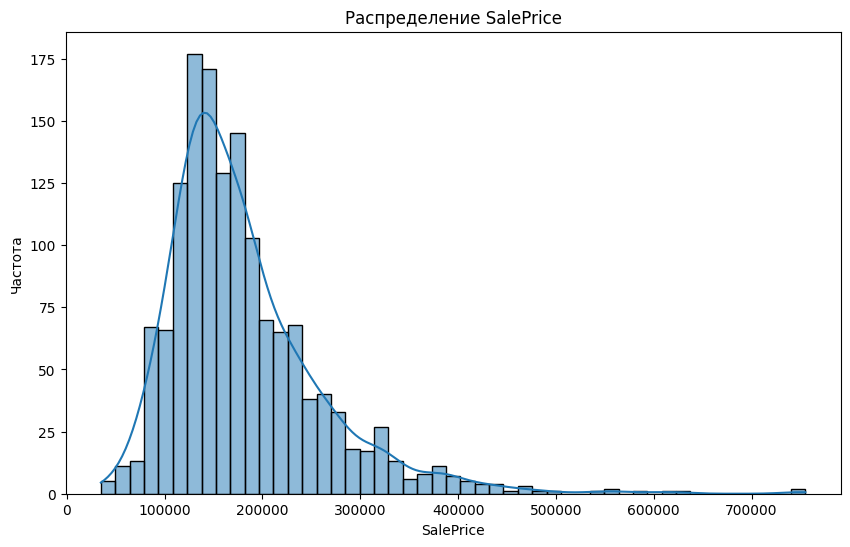

In [126]:
# Гистограмма
plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], kde=True)
plt.title('Распределение SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Частота')
plt.show()

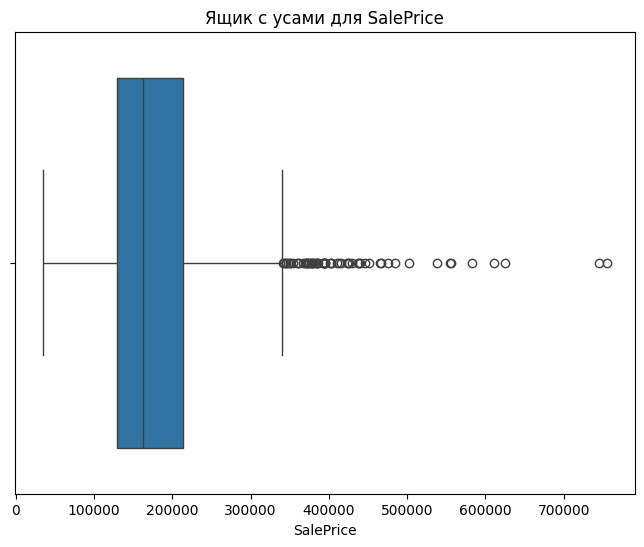

In [127]:
# Ящик с усами
plt.figure(figsize=(8, 6))
sns.boxplot(x='SalePrice', data=df)
plt.title('Ящик с усами для SalePrice')
plt.xlabel('SalePrice')
plt.show()

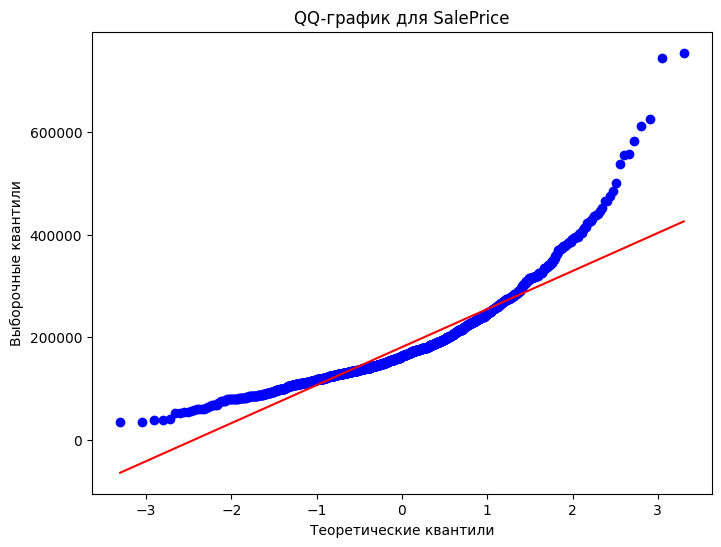

In [128]:
# QQ-график
plt.figure(figsize=(8, 6))
stats.probplot(df['SalePrice'], dist="norm", plot=plt)
plt.title('QQ-график для SalePrice')
plt.xlabel('Теоретические квантили')
plt.ylabel('Выборочные квантили')
plt.show()

In [129]:
# Обработаем выбросы

# Вычисление среднего и стандартного отклонения
mean_price = df['SalePrice'].mean()
std_price = df['SalePrice'].std()

# Определение верхней и нижней границы для выбросов
lower_bound = mean_price - 2 * std_price
upper_bound = mean_price + 2* std_price

# Замена выбросов на значения в пределах границ
df['SalePrice'] = np.where(df['SalePrice'] < lower_bound, lower_bound, df['SalePrice'])
df['SalePrice'] = np.where(df['SalePrice'] > upper_bound, upper_bound, df['SalePrice'])

In [130]:
# Описательная статистика
df['SalePrice'].describe()

count      1460.000000
mean     177321.597058
std       67181.792616
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      339806.201656
Name: SalePrice, dtype: float64

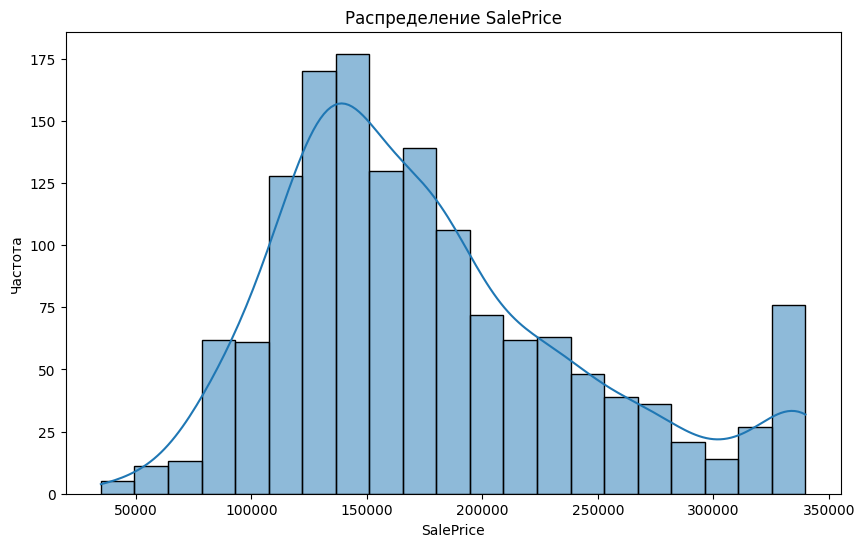

In [131]:
# Гистограмма
plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], kde=True)
plt.title('Распределение SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Частота')
plt.show()

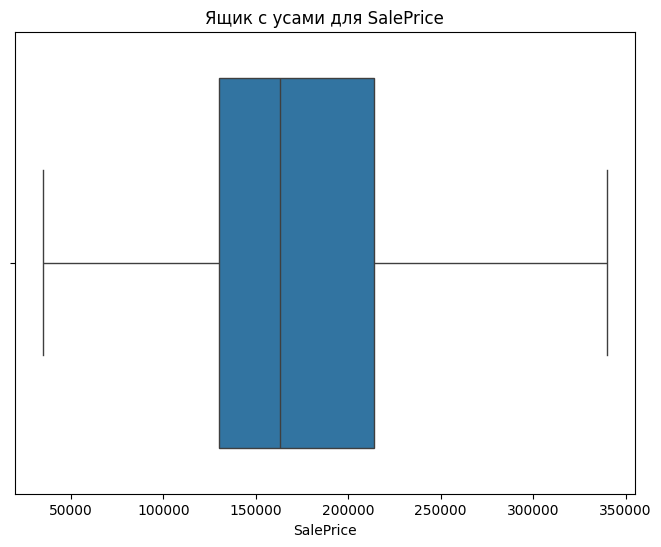

In [132]:
# Ящик с усами
plt.figure(figsize=(8, 6))
sns.boxplot(x='SalePrice', data=df)
plt.title('Ящик с усами для SalePrice')
plt.xlabel('SalePrice')
plt.show()

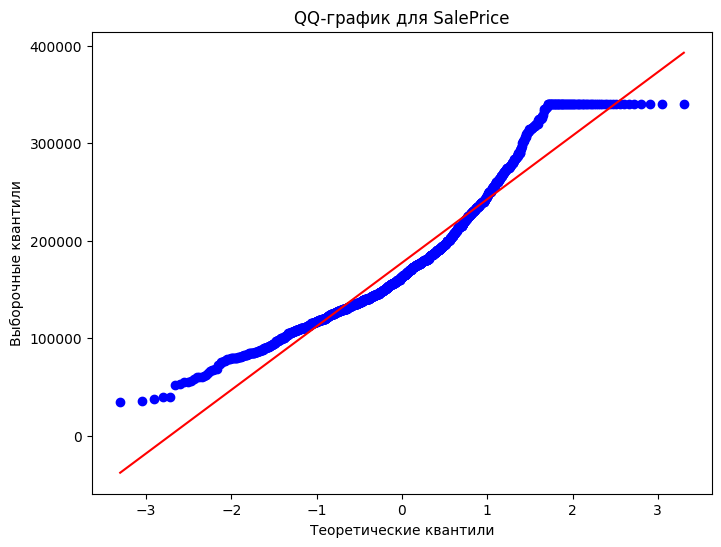

In [133]:
# QQ-график
plt.figure(figsize=(8, 6))
stats.probplot(df['SalePrice'], dist="norm", plot=plt)
plt.title('QQ-график для SalePrice')
plt.xlabel('Теоретические квантили')
plt.ylabel('Выборочные квантили')
plt.show()

In [134]:
# Описательная статистика
df['OverallQual'].describe()

count    1460.000000
mean        6.099315
std         1.382997
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64

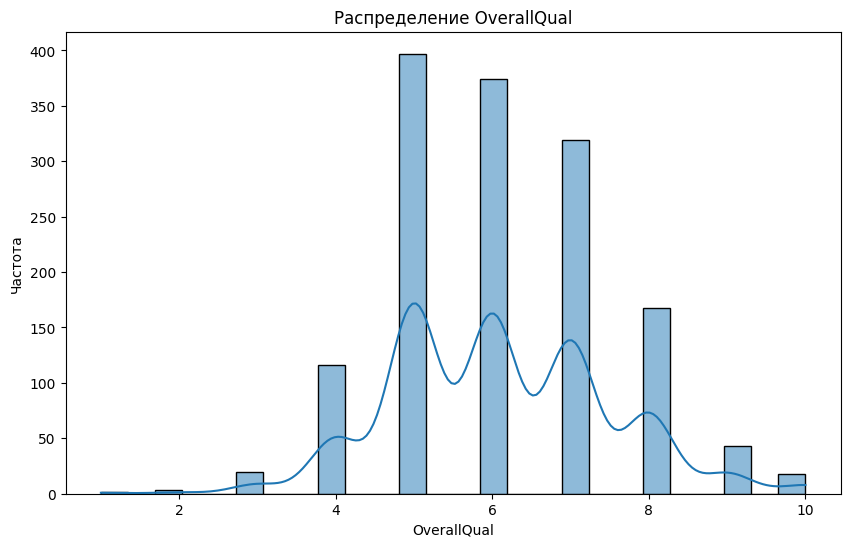

In [135]:
# Гистограмма
plt.figure(figsize=(10, 6))
sns.histplot(df['OverallQual'], kde=True)
plt.title('Распределение OverallQual')
plt.xlabel('OverallQual')
plt.ylabel('Частота')
plt.show()

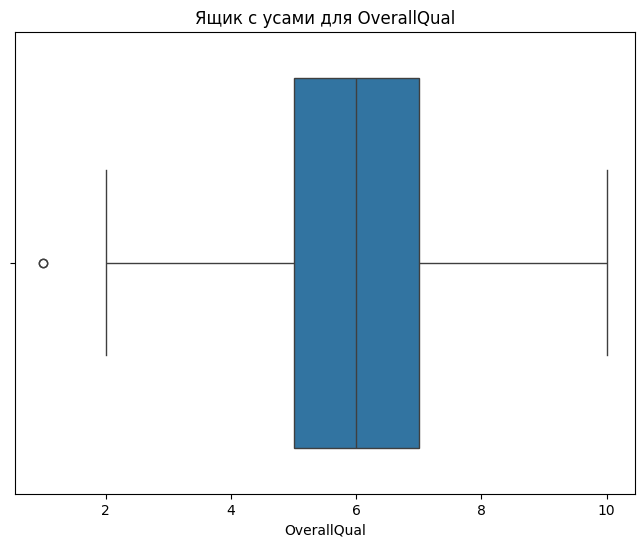

In [136]:
# Ящик с усами
plt.figure(figsize=(8, 6))
sns.boxplot(x='OverallQual', data=df)
plt.title('Ящик с усами для OverallQual')
plt.xlabel('OverallQual')
plt.show()

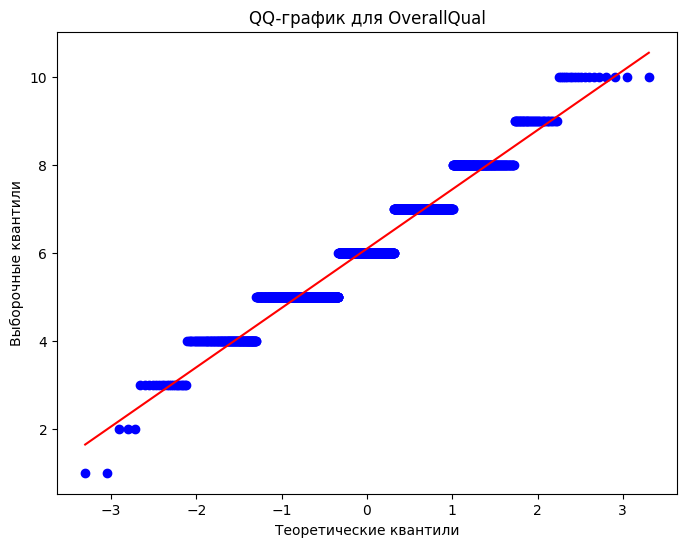

In [137]:
# QQ-график
plt.figure(figsize=(8, 6))
stats.probplot(df['OverallQual'], dist="norm", plot=plt)
plt.title('QQ-график для OverallQual')
plt.xlabel('Теоретические квантили')
plt.ylabel('Выборочные квантили')
plt.show()

In [138]:
# Описательная статистика
df['GrLivArea'].describe()

count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64

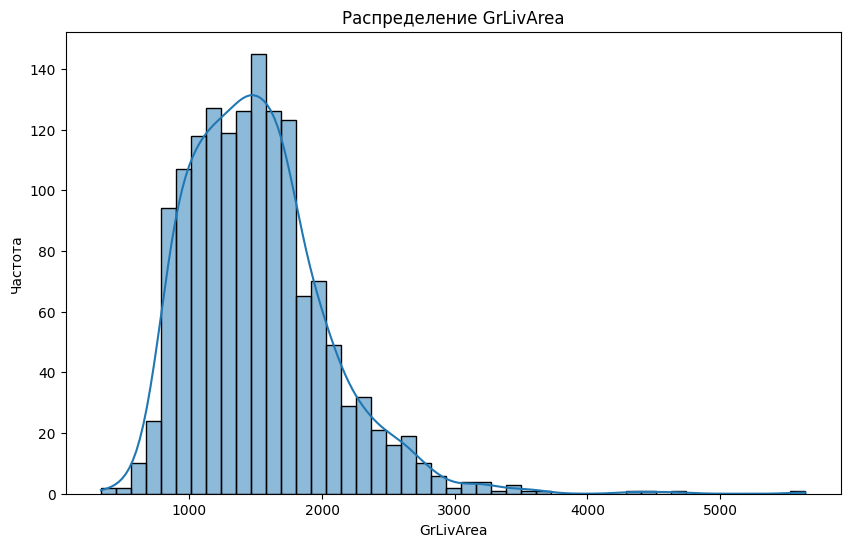

In [139]:
# Гистограмма
plt.figure(figsize=(10, 6))
sns.histplot(df['GrLivArea'], kde=True)
plt.title('Распределение GrLivArea')
plt.xlabel('GrLivArea')
plt.ylabel('Частота')
plt.show()

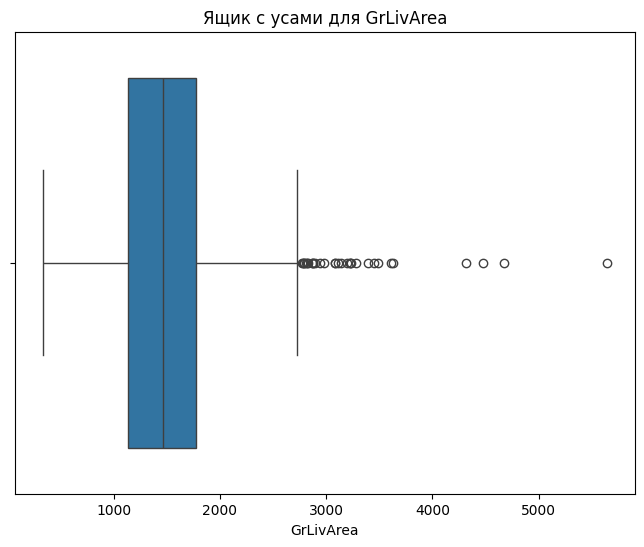

In [140]:
# Ящик с усами
plt.figure(figsize=(8, 6))
sns.boxplot(x='GrLivArea', data=df)
plt.title('Ящик с усами для GrLivArea')
plt.xlabel('GrLivArea')
plt.show()

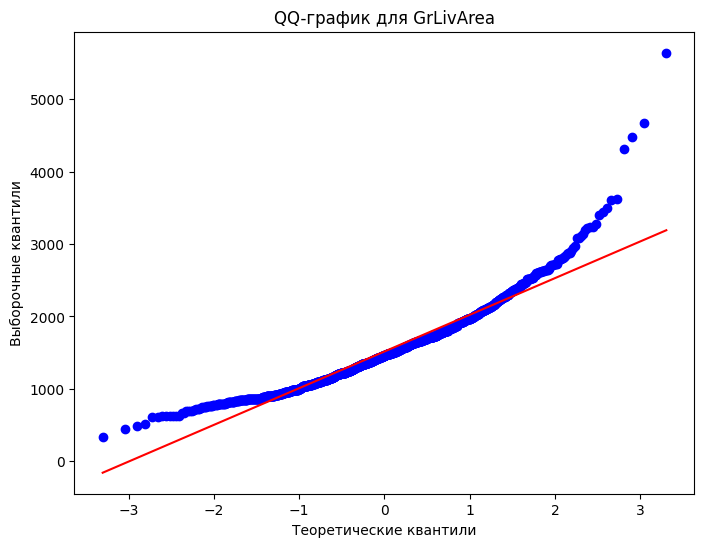

In [141]:
# QQ-график
plt.figure(figsize=(8, 6))
stats.probplot(df['GrLivArea'], dist="norm", plot=plt)
plt.title('QQ-график для GrLivArea')
plt.xlabel('Теоретические квантили')
plt.ylabel('Выборочные квантили')
plt.show()

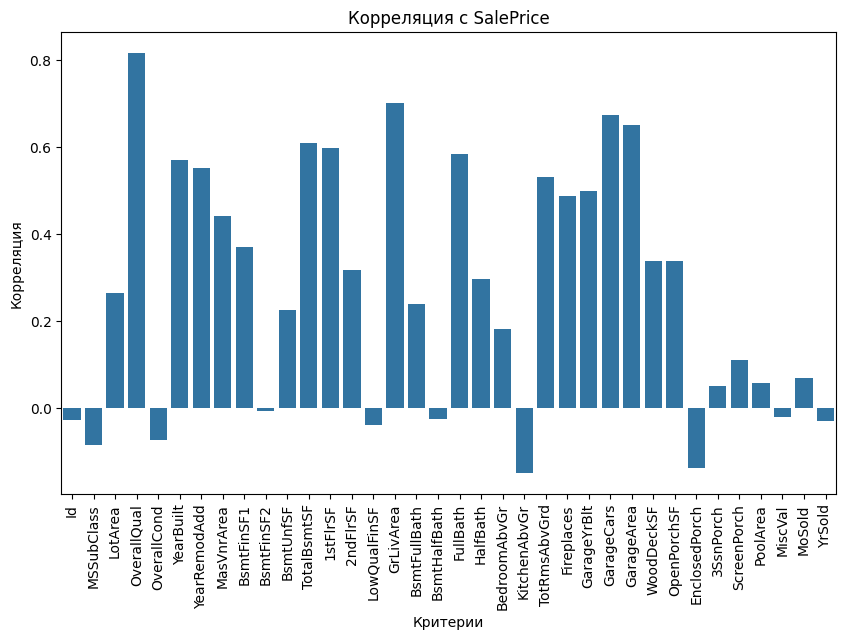

In [142]:
# Выберем только числовые столбцы, включая «Saleprice»
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Вычислим матрицу корреляции
correlation_matrix = numeric_df.corr()

# Выберем значения корреляции, связанные с «SALEPRICE»
saleprice_corr = correlation_matrix['SalePrice'].drop('SalePrice')

# Визуализируем корреляции с «SALEPRICE», используя график
plt.figure(figsize=(10, 6))
sns.barplot(x=saleprice_corr.index, y=saleprice_corr.values)
plt.title("Корреляция с SalePrice")
plt.xlabel("Критерии")
plt.ylabel("Корреляция")
plt.xticks(rotation=90)
plt.show()

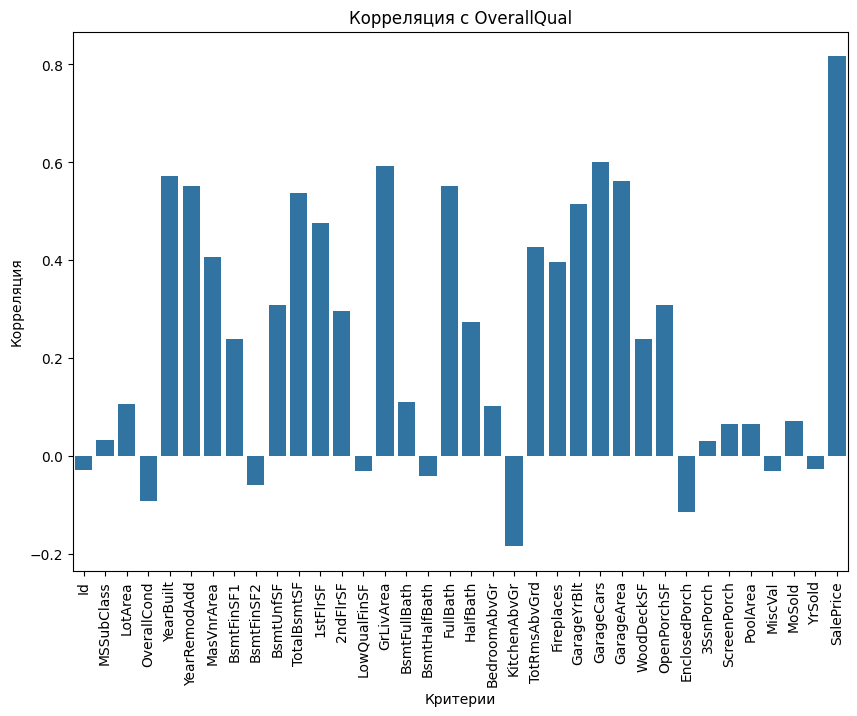

In [143]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Вычислить матрицу корреляции
correlation_matrix = numeric_df.corr()

overallqual_corr = correlation_matrix['OverallQual'].drop('OverallQual')

plt.figure(figsize=(10, 7))
sns.barplot(x=overallqual_corr.index, y=overallqual_corr.values)
plt.title("Корреляция с OverallQual")
plt.xlabel("Критерии")
plt.ylabel("Корреляция")
plt.xticks(rotation=90)
plt.show()

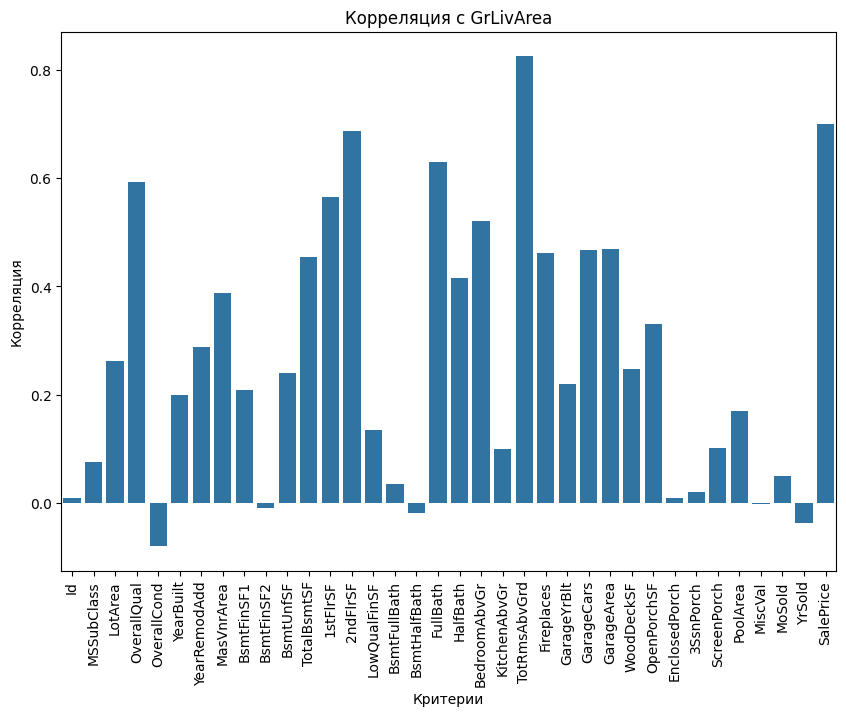

In [144]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
# Вычислить матрицу корреляции
correlation_matrix = numeric_df.corr()

grlivarea_corr = correlation_matrix['GrLivArea'].drop('GrLivArea')

plt.figure(figsize=(10, 7))
sns.barplot(x=grlivarea_corr.index, y=grlivarea_corr.values)
plt.title("Корреляция с GrLivArea")
plt.xlabel("Критерии")
plt.ylabel("Корреляция")
plt.xticks(rotation=90)
plt.show()

Выполните проектирование признаков путем реализации следующих преобразований: a. Работайте с категориальными переменными, применяя one-hot encoding или label encoding, в зависимости от характера переменной. b. При необходимости создайте новые характеристики, такие как общая площадь или возраст объекта недвижимости, путем объединения существующих характеристик.
Сохраните очищенный и преобразованный набор данных в новый CSV-файл под названием 'cleaned_house_prices.csv'.

In [145]:
df.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000.0


In [146]:
# Выполнение one-hot encoding столбца "MSZoning"
df = pd.get_dummies(df, columns=['MSZoning'])

In [147]:
df.head()

,Id,MSSubClass,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,MoSold,YrSold,SaleType,SaleCondition,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,1,60,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,2,2008,WD,Normal,208500.0,False,False,False,True,False
1,2,20,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,5,2007,WD,Normal,181500.0,False,False,False,True,False
2,3,60,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,9,2008,WD,Normal,223500.0,False,False,False,True,False
3,4,70,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,2,2006,WD,Abnorml,140000.0,False,False,False,True,False
4,5,60,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,12,2008,WD,Normal,250000.0,False,False,False,True,False


In [148]:
df.to_csv('cleaned_house_prices.csv', index=False)